# BAIT 509 Assignment 1

__Evaluates__: Lectures 1 - 4. 

__Rubrics__: Your solutions will be assessed primarily on the accuracy of your coding, as well as the clarity and correctness of your written responses. The MDS rubrics provide a good guide as to what is expected of you in your responses to the assignment questions. In particular, here are the most relevant ones:

- [accuracy rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_accuracy.md), for evaluating your code.
- [reasoning rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_reasoning.md), for evaluating your written responses.

## Tidy Submission (5%)

- Complete this assignment by filling out this jupyter notebook.
- You must use proper English, spelling, and grammar.
- You will submit two things to Canvas:
    1. This jupyter notebook file containing your responses; and,
    2. A html file of your completed notebook (use `jupyter nbconvert --to html_embed assignment.ipynb` in the terminal to generate the html file).
- Submit your assignment through [UBC Canvas](https://canvas.ubc.ca/courses/35074) by **6pm Monday 20th January**.

## Exercise 1: $k$-NN Fundamentals (worth a total of 35%)


Here we will attempt classification of the famous handwritten digits data set. 

This data set exists in many forms; but we will use the one bundled in `sklearn.datasets` in Python. You can read more about the data [here](https://scikit-learn.org/stable/datasets/index.html#digits-dataset).

Use the following cell to load and extract the data into features (`X`) and target (`y`):

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits['data']    # this is the data with each 8x8 image "flattened" into a length-64 vector.
y = digits['target']  # these are the labels (0-9).

Here's a plot of a random example:

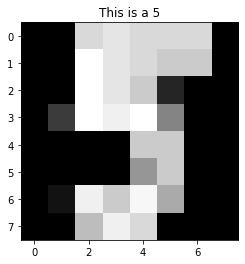

In [3]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title(f"This is a {digits['target'][idx]}");

### 1(a) Fundamentals (15%)


1. How many features are there, and what are they?
2. Which is closer to the digit 0 (`X[0]`): the digit 1 (`X[1]`) or the digit 2 (`X[2]`)? Report the two Euclidean distances (hint: you might find the [sklearn function euclidean_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) useful here).
3. Using the above information, if only elements 1 and 2 are used in a $k$-NN classifier with $k=1$, what would element 0 be classified as, and why?

#### <font color="green">Solution 1a.1</font>

In [4]:
print(f"There are {X.shape[1]} features.")
print(f"They are the 8 x 8 pixel intensities flattened into a 1d array")

There are 64 features.
They are the 8 x 8 pixel intensities flattened into a 1d array


#### <font color="green">Solution 1a.2</font>

In [5]:
from sklearn.metrics.pairwise import euclidean_distances
print(f"The distance between X[0] and X[1] = \
{euclidean_distances(X[0].reshape(1, -1), X[1].reshape(1, -1))[0][0]:.2f}")
print(f"The distance between X[0] and X[2] = \
{euclidean_distances(X[0].reshape(1, -1), X[2].reshape(1, -1))[0][0]:.2f}")
print(f"The digit 2 is closer to the digit 0 based on Euclidean distance.")

The distance between X[0] and X[1] = 59.56
The distance between X[0] and X[2] = 54.13
The digit 2 is closer to the digit 0 based on Euclidean distance.


#### <font color="green">Solution 1a.3</font>

Element 0 would be classified as Element 2 because it is the closest match.

### 1(b) Investigating error (10%)

You'll be using a [*k*-NN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for this question.

Using `k=20`, fit a $k$-NN classifier with `X` and `Y` using all of the data as your training data. Then, obtain the predictions of `X`. 

1. What proportion of these predictions are incorrect? This is called the _error rate_.    
2. Choose one case that was not predicted correctly. What was predicted, and what is the correct label? Plot the image, and comment on why you think the classifier made a mistake. 



#### <font color="green">Solution 1b.1</font>

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20).fit(X, y)
print(f"Proportion of incorrect predictions/error rate = {1 - model.score(X, y):.2f}")

Proportion of incorrect predictions/error rate = 0.02


#### <font color="green">Solution 1b.2</font>

Element 5 was predicted as 9 but is a 5.


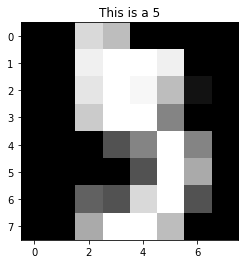

In [7]:
import numpy as np
first_incorrect = np.argmax(model.predict(X) != y)
print(f"Element {first_incorrect} was predicted as \
{model.predict(X)[first_incorrect]} but is a {y[first_incorrect]}.")
plt.imshow(digits['images'][first_incorrect], cmap='Greys_r')
plt.title(f"This is a {y[first_incorrect]}");

### 1(c) One Nearest Neighbour error (10%)

Now fit the classifier using `k=1`, using all of your data as training data, and again obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? Briefly explain why this error rate is achieved (in one or two sentences; think about how the $k$-NN algorithm works).    
2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier _for sure_ predict the label correctly? Briefly explain why or why not.

#### <font color="green">Solution 1c.1</font>

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1).fit(X, y)
print(f"Proportion of incorrect predictions/error rate = {1 - model.score(X, y):.2f}")

Proportion of incorrect predictions/error rate = 0.00


This error rate is achieved because we are using k=1, i.e. to make a prediction of each datapoint in X, we compare it to the 1 nearest neighbour in X (which is itself) so we will always achieve 0 error. Unless there are two instances of X with different labels.

#### <font color="green">Solution 1c.2</font>

It is not guaranteed that a new handwritten digit (i.e., not in the dataset) will be for sure correctly predicted. The new digit will be compared to the 1 nearest neighbour which may or may not be the correct classification.

## Exercise 2: Investigating $k$-NN Error (worth a total of 20%)

In lectures, we explored how the value of $k$ could influence the train/test error. In this question, we will explore how the partition of train/test data can influence error.

Choose any value of $k$ between 1 and 10. For different partitions of the full data set into training and testing sets (e.g., 10%/90%, 20%/80%, 30%/70%, etc.), obtain training and test error rates. Plot training and test error (on the same axes) vs. the proportion of training examples. Briefly comment on the insights that this plot yields.


#### <font color="green">Solution 2</font>

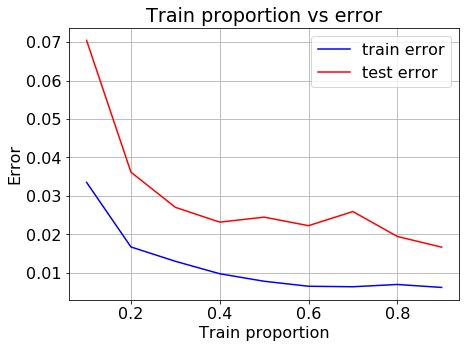

In [34]:
# imports
from sklearn.model_selection import train_test_split
import pandas as pd
import altair as alt
# calculation loop
error_dict = {'train_proportion': [],
              'train_error': [],
              'test_error': []} # store results in a dictionary
for split in np.arange(0.1, 1, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=split,
                                                        random_state=123) # split data
    model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train) # create model
    error_dict['train_proportion'].append(1 - split) # store the train proportion ("split") for plotting
    error_dict['train_error'].append(1 - model.score(X_train, y_train)) # store train error
    error_dict['test_error'].append(1 - model.score(X_test, y_test)) # store test error
# plot with matplotlib
plt.rcParams.update({'font.size': 16}) # update font size of plot
plt.subplots(1, 1, figsize = (7, 5)) # create plot canvas
plt.plot(error_dict['train_proportion'], error_dict['train_error'], '-b', label='train error')  # plot the two lines
plt.plot(error_dict['train_proportion'], error_dict['test_error'], '-r', label='test error')
plt.grid() # the next few lines are formatting
plt.title('Train proportion vs error')
plt.xlabel('Train proportion')
plt.ylabel('Error')
plt.legend();

The plot shows that both train and test error reduces as the training proportion increases. This makes sense because we are using more data to create our model. However, it's worth noting that after a train proportion of around 0.4, there is not much change in test error.

## Exercise 3: Decision Trees (worth a total of 40%)

We'll be using the famous Titanic dataset to try and predict survival of passengers (`Survival`) from `Age`, `Fare`, and `Sex`, using a decision tree classifier. You can find the data in the assignment folder on Canvas. Details of the data can be found at https://www.kaggle.com/c/titanic/data. You will need to select only the columns above from the full dataset provided.

### 3(a) Feature pre-processing (15%)

1. Load the data into a pandas dataframe using the `pd.read_csv()` function. How many observations are there in the data? Remove all rows from the dataframe that contain a `NaN` value using the function `df.dropna()`. How many observations are there now?
2. Use one-hot-encoding to encode the `Sex` column to numeric values (don't forget to drop the first column using the argument `drop="first"` and to specify `sparse=False`). Ouput the head of the transformed dataframe.
3. Is it necessary to scale the numeric features for use in your decision tree classifier? In 1-2 sentences, briefly explain your answer.
4. Split the data into 80% training, 20% testing data.

#### <font color="green">Solution 3a.1</font>

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic.csv', index_col=0)[['Age', 'Sex', 'Fare', 'Survived']]
print(f"There are {df.shape[0]} observations before NaN removal.")
df = df.dropna()
print(f"There are {df.shape[0]} observations after NaN removal.")

There are 891 observations before NaN removal.
There are 714 observations after NaN removal.


#### <font color="green">Solution 3a.2</font>

In [36]:
ohe = OneHotEncoder(sparse=False, drop='first', dtype=int)
df['Sex'] = ohe.fit_transform(df[['Sex']]) # 0 = female, 1 = male
df.head()

,Age,Sex,Fare,Survived
PassengerId,,,,
1,22.0,1,7.2500,0
2,38.0,0,71.2833,1
3,26.0,0,7.9250,1
4,35.0,0,53.1000,1
5,35.0,1,8.0500,0


#### <font color="green">Solution 3a.3</font>

No, tree-based algorithms are unaffected by different scales in the data.

#### <font color="green">Solution 3a.4</font>

In [37]:
X = df.drop(columns='Survived')
y = df[['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

### 3(b) Hyperparameter optimization (10%)

1. Using 10-fold cross validation and the training set only, find an appropriate value for the `max_depth` hyperparameter for a decision tree classifier. Make a plot of training error and cross-validation error for different values of `max_depth`.
2. In 1-2 sentences, briefly discuss what sections of your plot likely represent a model that is well fit to the data and which sections represent a model that is overfit.

#### <font color="green">Solution 3b.1</font>

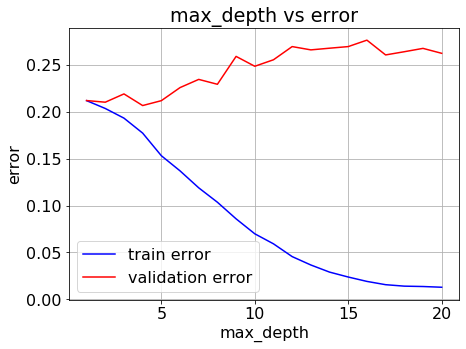

In [39]:
from sklearn.model_selection import cross_validate
# calculation loop
max_depth_dict = {'max_depth':[], 'train_error':[], 'validation_error': []}
for depth in np.arange(1, 21):
    model = DecisionTreeClassifier(max_depth = depth, random_state=0)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    max_depth_dict['max_depth'].append(depth)    
    max_depth_dict['train_error'].append(1 - scores['train_score'].mean())
    max_depth_dict['validation_error'].append(1 - scores['test_score'].mean())
# plot with matplotlib
plt.rcParams.update({'font.size': 16}) # update font size of plot
plt.subplots(1, 1, figsize = (7, 5)) # create plot canvas
plt.plot(max_depth_dict['max_depth'], max_depth_dict['train_error'], '-b', label='train error')  # plot the two lines
plt.plot(max_depth_dict['max_depth'], max_depth_dict['validation_error'], '-r', label='validation error')
plt.grid() # the next few lines are formatting
plt.title('max_depth vs error')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend();

#### <font color="green">Solution 3b.2</font>

The model appears well fit at low max_depths (1-4). It appears overfit at max_depths > 4 as the training and validation error diverges considerably.

### 3(c) Final model (15%)

Based on your results from 3(b) select a value for the hyperparameter `max_depth`. In 1-2 sentences briefly explain why you chose this particular value. Train a decision tree classifier using the training set and your chosen `max_depth` hyperparameter and then obtain the test error on the test set.

#### <font color="green">Solution 3b.2</font>

Based on the plot above, I will choose a max_depth of 4 (although 1, 2 or 3 would also be valid options) because at this max_depth, validation error is minimised but the model does not appear significantly overfit.

In [40]:
model = DecisionTreeClassifier(max_depth = 4, random_state=123)
model.fit(X_train, y_train)
print(f"Error rate on test data = {1 - model.score(X_test, y_test):.2f}")

Error rate on test data = 0.24
